## LIBRERÍAS

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

## DICCIONARIO DEL DATASET

In [4]:
dicc = pd.read_excel('Diccionario_Banco.xlsx', header=1, names=['Variable', 'Significado'], index_col=False)
dicc

C:\Users\GMA207\AppData\Local\Temp\ipykernel_3336\370641646.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dicc = pd.read_excel('Diccionario_Banco.xlsx', header=1, names=['Variable', 'Significado'], index_col=False)


Variable                                        Significado
0                     age                                   Edad del cliente
1                     job                         Tipo de empleo del cliente
2          martial status                                      Estado civil 
3               education          Educacion maxima alcanzada por el cliente
4                  Credit                     Si tiene deuda de crédito o no
5                 balance          Promedio de saldo en la cuenta en el anio
6            housing loan                      Si tiene seguro de hogar o no
7            Persona loan                            Si tiene prestamos o no
8                 contact                      tipo con contacto del cliente
9        Last Contact Day    Ultimo dia de contacto con el cliente en el mes
10     Last Contact Month   Ultimo mes de contacto con el cliente en el anio
11  Last Contact Duration  Duracion del ultimo contacto con el cliente me...
12               campaign  Cantidad de contactos al cliente durante esta ...
13                  pdays  Cantidad de dias que pasaron del último contac...
14               previous  Cantidad de contactos previos a esta campania ...
15               poutcome  Performance de la campania de marketing anteri...
16           Subscription   Si el cliente accede a la campania (1) o no (0).

## CARGA DEL DATASET

In [6]:
# se carga el dataset en la variable bankdata
bankdata = pd.read_csv('bank_subscription.csv', sep=';')
bankdata.sample(5)

Age           Job Marital Status  Education Credit  Balance (euros)  \
6812   38.0  entrepreneur        married  secondary     no             61.0   
29177  40.0      services        married  secondary     no            683.0   
2904   57.0       retired       divorced        NaN     no           2439.0   
38834  24.0    technician         single  secondary    NaN           -232.0   
42056  28.0       student         single   tertiary     no           2306.0   

      Housing Loan Personal Loan   Contact  Last Contact Day  \
6812           NaN           yes   unknown                28   
29177          yes            no  cellular                 2   
2904           yes            no   unknown                14   
38834          yes            no  cellular                18   
42056           no           NaN  cellular                29   

      Last Contact Month  Last Contact Duration  Campaign  Pdays  Previous  \
6812                 may                  170.0         5    NaN         0   
29177                feb                  299.0         2    NaN         0   
2904                 may                   32.0         1   -1.0         0   
38834                may                  108.0         1   -1.0         0   
42056                oct                  140.0         2   -1.0         0   

      Poutcome  Subscription  
6812   unknown             0  
29177  unknown             0  
2904   unknown             0  
38834  unknown             0  
42056  unknown             0

In [7]:
# se visualizan las dimensiones del dataset
print(f'Cantidad de filas: {bankdata.shape[0]}')
print(f'Cantidad de columnas: {bankdata.shape[1]}')

Cantidad de filas: 45211
Cantidad de columnas: 17


# EDA

## LIMPIEZA

In [10]:
# nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.
eda_df=pd.concat([bankdata.isnull().sum(), np.round(bankdata.isnull().mean()*100,0),bankdata.dtypes], axis=1)
eda_df.columns=["Nulos","[%]","Dtype"]
eda_df

Nulos   [%]    Dtype
Age                     4973  11.0  float64
Job                     4973  11.0   object
Marital Status          4973  11.0   object
Education               4973  11.0   object
Credit                  4973  11.0   object
Balance (euros)         4973  11.0  float64
Housing Loan            7686  17.0   object
Personal Loan           7686  17.0   object
Contact                    0   0.0   object
Last Contact Day           0   0.0    int64
Last Contact Month         0   0.0   object
Last Contact Duration   7686  17.0  float64
Campaign                   0   0.0    int64
Pdays                   7686  17.0  float64
Previous                   0   0.0    int64
Poutcome                   0   0.0   object
Subscription               0   0.0    int64

En el dataset podemos visualizar que hay variables que contienen desde un 11% hasta un 17% de datos nulos, con lo cual se deberá analizar de que forma se manejaran estos valores nulos. Antes de ello, se hará un control sobre las variables categóricas y numéricas en busca de lo siguiente:
- **Categóricas:** Verificar la existencia de clases dentro de la variable que tengan nombres distintos y que se refieran a lo mismo.
- **Numéricas:** Verificar que no haya valores incoherentes para el significado de la variable numérica.

### MANEJO DE VARIABLES CATEGÓRICAS

In [13]:
# se eliminan las filas con nulos
bankdata_sin_null = bankdata.dropna()
# solo mantenemos las variables categoricas
bankdata_categoricas = bankdata_sin_null.select_dtypes(include=['object'])

print('CLASES POR VARIABLE \n')
# se visualizan las clases unicas de cada variable categorica
for columna in bankdata_categoricas.columns:
    categorias_unicas = bankdata_categoricas[str(columna)].unique()
    print(f'categorias de {columna.upper()} -> {categorias_unicas} \n')

CLASES POR VARIABLE 

categorias de JOB -> ['management' 'technician' 'services' 'retired' 'admin.' 'blue-collar'
 'housemaid' 'entrepreneur' 'student' 'self-employed' 'unknown'
 'unemployed'] 

categorias de MARITAL STATUS -> ['single' 'married' 'divorced'] 

categorias de EDUCATION -> ['tertiary' 'secondary' 'primary' 'unknown'] 

categorias de CREDIT -> ['no' 'yes'] 

categorias de HOUSING LOAN -> ['yes' 'no'] 

categorias de PERSONAL LOAN -> ['yes' 'no'] 

categorias de CONTACT -> ['unknown' 'cellular' 'telephone'] 

categorias de LAST CONTACT MONTH -> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

categorias de POUTCOME -> ['unknown' 'other' 'failure' 'success'] 



Todas las variables tienen clases únicas con significados diferentes. No hace falta hacer ninguna modificación en ellas.

### MANEJO DE VARIABLES NUMÉRICAS

In [16]:
# Visualizacion de metricas principales de todas las variables numericas
bankdata_sin_null.describe()

Age  Balance (euros)  Last Contact Day  Last Contact Duration  \
count  10630.000000     10630.000000      10630.000000           10630.000000   
mean      41.089276      1357.860960         15.696331             256.620978   
std       10.652741      3028.454521          8.328843             259.270058   
min       18.000000     -2604.000000          1.000000               0.000000   
25%       33.000000        72.000000          8.000000             104.000000   
50%       39.000000       446.000000         16.000000             180.000000   
75%       49.000000      1454.000000         21.000000             316.000000   
max       95.000000     81204.000000         31.000000            4918.000000   

           Campaign         Pdays      Previous  Subscription  
count  10630.000000  10630.000000  10630.000000  10630.000000  
mean       2.780245     40.912888      0.563311      0.112982  
std        3.113898    100.954838      1.861234      0.316586  
min        1.000000     -1.000000      0.000000      0.000000  
25%        1.000000     -1.000000      0.000000      0.000000  
50%        2.000000     -1.000000      0.000000      0.000000  
75%        3.000000     -1.000000      0.000000      0.000000  
max       55.000000    828.000000     51.000000      1.000000

A priori la única variable que presenta valores incoherentes es Pdays. El valor -1, que indica que no hubo contacto previo con el cliente, resulta ser un valor antiintuitivo. Se decidió reemplazar dichos valores por el valor máximo de la variable (828), ya que es un valor más semejante a que nunca haya habido un contacto con el cliente.

Text(0, 0.5, 'Cantidad')

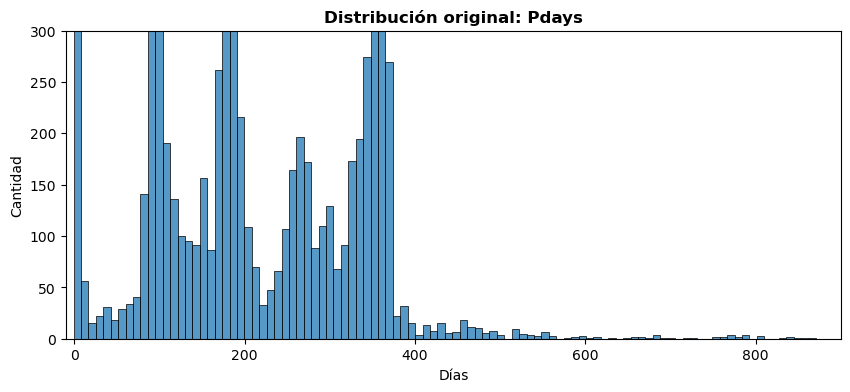

In [18]:
# visualizacion de un histograma de Pdays previo a hacer los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,300)
plt.title("Distribución original: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

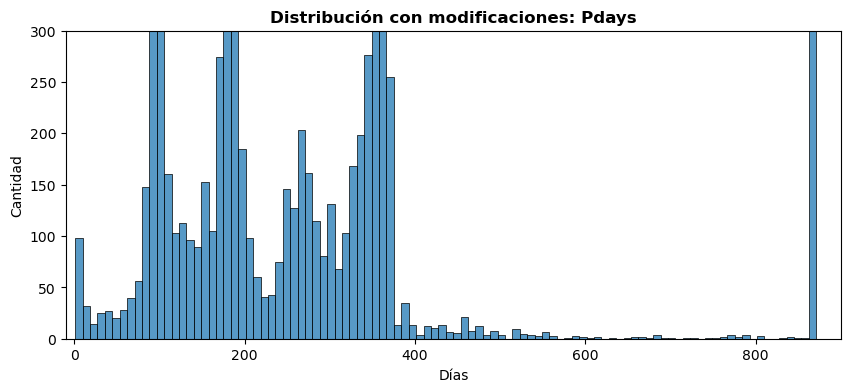

In [19]:
# reemplazo de Pdays = 1 con el valor maximo de Pdays
mask_pdays_1 = bankdata['Pdays'] == -1
bankdata.loc[mask_pdays_1, 'Pdays'] = bankdata['Pdays'].max()

# visualizacion de un histograma de Pdays luego de hacer los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,300)
plt.title("Distribución con modificaciones: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

### MANEJO DE VALORES NULOS

Como se visualizó antreriormente las variables poseen entre un 11% y 17% de valores nulos, con lo cual en ningun caso se eliminará la variable. Para la imputación de los valores nulos se siguieron los siguientes dos criterios en función de si la variable es numérica o categórica:
- **Categóricas:** Se comparó cada variable categórica contra otra variable categórica o numérica discretizada (con deciles) para poder reemplazar los nulos con la moda resultante de la comparación.
- **Numéricas:** En función de la distribución de los datos de cada variable se decidirá si es conveniente reemplazar los nulos con la media, mediana o con algún otro valor en específico de la propia variable numérica.

Particularmente, las imputaciones definidas, y que se realizarán a continuación, para los registros nulos de cada variable son las siguientes:
- **Pdays** -> con valor max Pdays
- **Last Contact Duration** -> con mediana Last Contact Duration
- **Balance (euros)** -> con mediana Balance (euros)
- **Job** -> con moda Job por Decil Balance (euros)
- **Education** -> con moda Education por Job
- **Age** -> con mediana Age por Job
- **Marital Status** -> con moda Marital Status por Decil Age
- **Housing Loan** -> con moda Housing Loan por Decil Age
- **Credit** -> con moda Credit
- **Personal Loan** -> con moda Personal Loan

In [22]:
# se crea un dataframe para aplicar las transformaciones sin afectar el original
bankdata_clean = bankdata.copy()

#### Variable numérica: Pdays

Anteriormente, se visualizó la distribución de Pdays luego de reemplazar los valores -1 por el máximo de Pdays. Se podía observar que la mayoría de usuarios no habían sido contactados previamente. A continuación validaremos esto:

In [25]:
# cantidad de usuarios con Pdays = maximo de Pdays
cant_pdays_max = bankdata.loc[bankdata['Pdays'] == bankdata['Pdays'].max(), 'Pdays'].count()
# cantidad de usuarios con Pdays != maximo de Pdays y no nulo
cant_pdays_no_max = bankdata.loc[(bankdata['Pdays'] != bankdata['Pdays'].max()) & (bankdata['Pdays'].notnull()), 'Pdays'].count()
# proporcion de valores Pdays = maximo de Pdays sobre el total de registros no nulos de Pdays
prop_pdays_max = cant_pdays_max / (cant_pdays_no_max + cant_pdays_max) * 100


print(f'Cantidad de Pdays = max: {cant_pdays_max}')
print(f'Cantidad de Pdays != max y no nulo: {cant_pdays_no_max}')
print(f'Proporción de Pdays = max sobre el total no nulo: {prop_pdays_max:.2f}%')

Cantidad de Pdays = max: 30686
Cantidad de Pdays != max y no nulo: 6839
Proporción de Pdays = max sobre el total no nulo: 81.77%


Casi el 82% de los clientes no fueron contactados previamente. Por ende, se reemplazarán los valores nulos de Pdays por el valor máximo de Pdays que según lo antes analizado querra decir que nunca fueron contactados.

True


Text(0, 0.5, 'Cantidad')

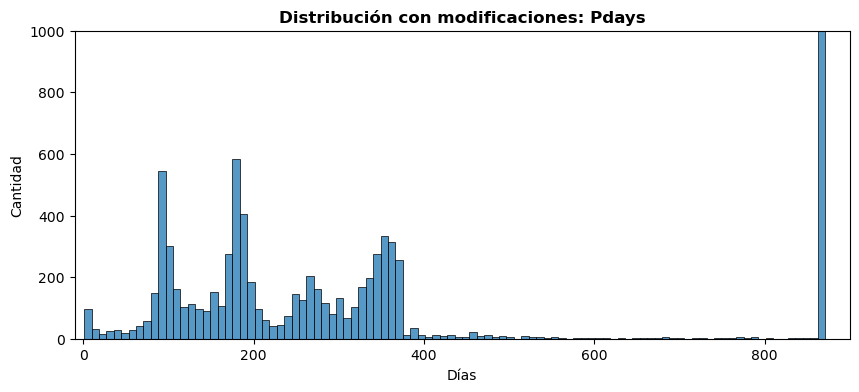

In [27]:
# se reemplzan los valores nulos de Pdays con el máximo de Pdays
bankdata_clean['Pdays'] = bankdata_clean['Pdays'].fillna(bankdata['Pdays'].max())

# verificacion de Balance (euros) sin nulls
print(bankdata_clean['Pdays'].isnull().sum() == 0)

# visualizacion de la distribucion de Pdays luego de los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata_clean, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,1000)
plt.title("Distribución con modificaciones: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

#### Variable numérica: Last Contact Duration

Text(0, 0.5, 'Cantidad')

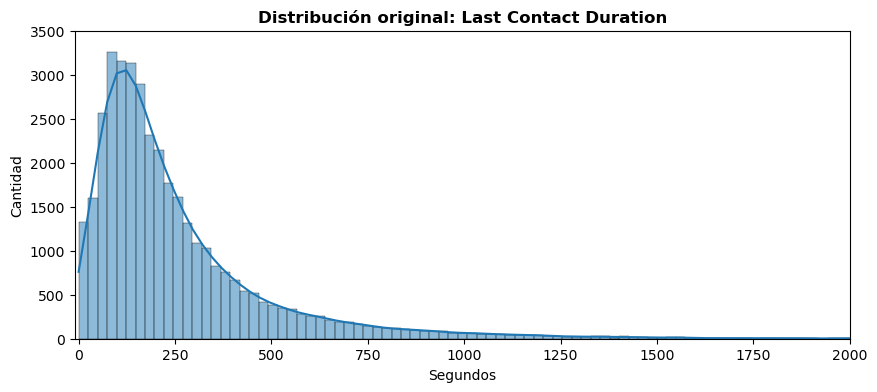

In [29]:
# visualizacion de la distribucion de Last Contact Duration
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Last Contact Duration', bins=200, kde=True)
plt.xlim(-10,2000)
plt.ylim(0,3500)
plt.title("Distribución original: Last Contact Duration",fontweight='bold')
plt.xlabel("Segundos")
plt.ylabel("Cantidad")

Dado que la distribución de Last Contact Duration es similar a una normal con sesgo positivo, se reemplazarán sus valores nulos utilizando la mediana de la propia variable.

In [31]:
# se imputan la mediana de Last Contact Duration en sus registros nulos.
bankdata_clean['Last Contact Duration'] = bankdata_clean['Last Contact Duration'].fillna(bankdata['Last Contact Duration'].median())

# verificacion de Last Contact Duration sin nulls
bankdata_clean['Last Contact Duration'].isnull().sum() == 0

True

#### Variable numérica: Balance (euros)

Text(0, 0.5, 'Cantidad')

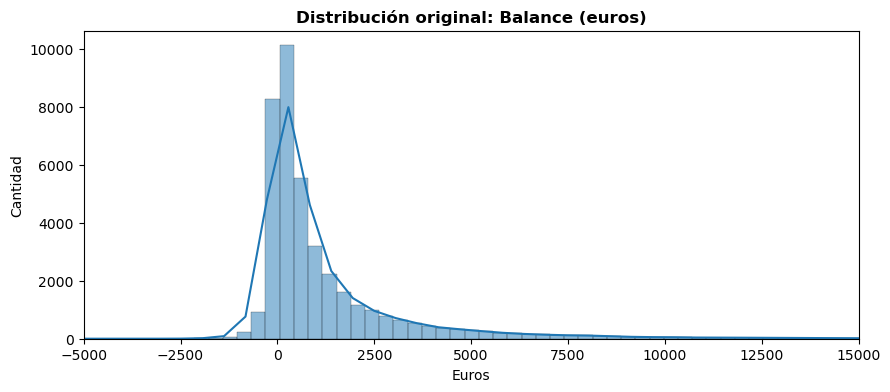

In [33]:
# visualizacion de la distribución de Balance (euros)
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bankdata_clean, x= 'Balance (euros)', bins=300, kde=True)
plt.xlim(-5000,15000)
plt.title("Distribución original: Balance (euros)",fontweight='bold')
plt.xlabel("Euros")
plt.ylabel("Cantidad")

Dado que la distribución de Balance (euros) es similar a una normal con sesgo positivo, se reemplazaran sus valores nulos utilizando la mediana de la propia variable.

In [35]:
# se imputan la mediana de Balance (euros) en sus registros nulos.
bankdata_clean['Balance (euros)'] = bankdata_clean['Balance (euros)'].fillna(bankdata['Balance (euros)'].median())

# verificación de Balance (euros) sin nulls
bankdata_clean['Balance (euros)'].isnull().sum() == 0

True

#### Variable categórica: Job

Text(0, 0.5, 'Cantidad')

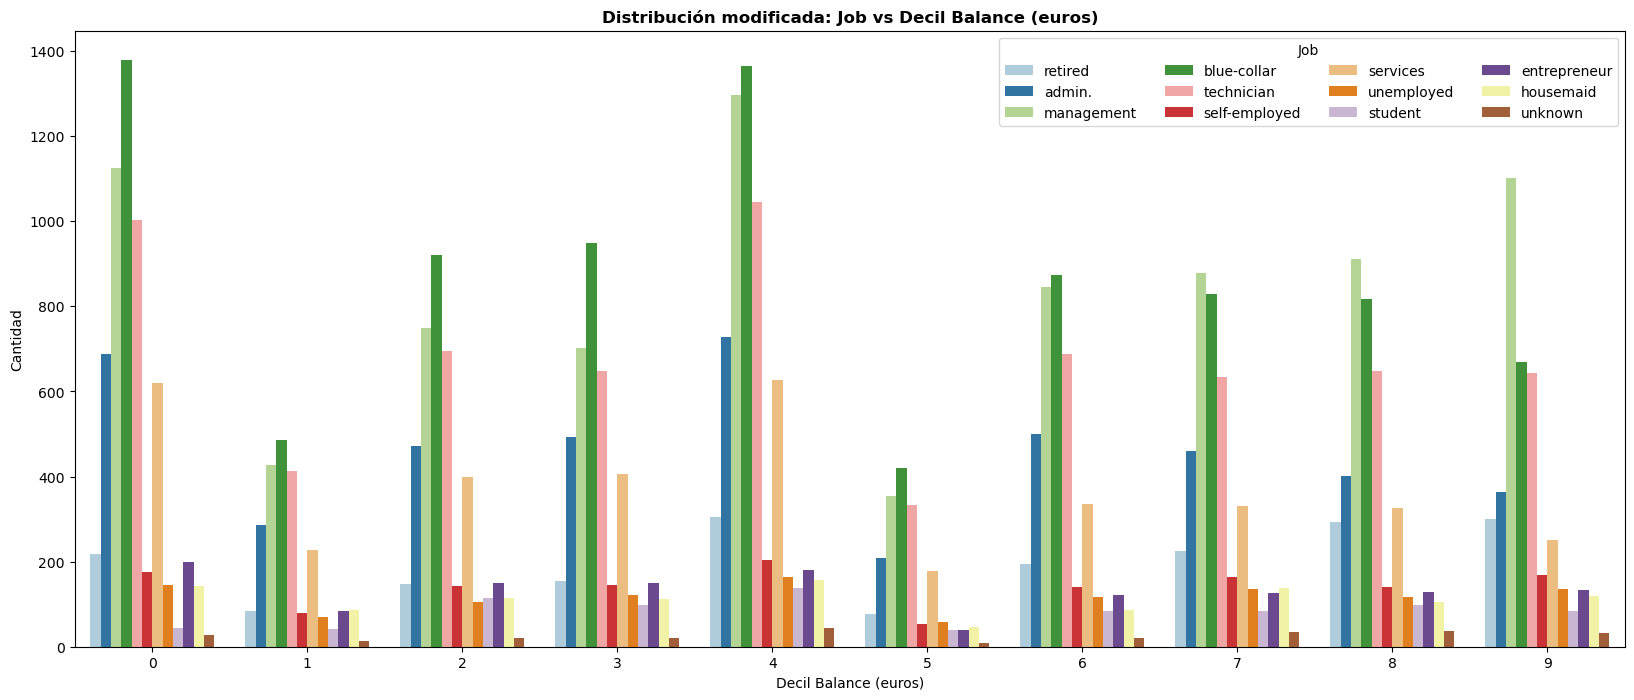

In [37]:
# se crea una variable que contiene el número de decil de Balance (euros) para cada usuario
bankdata_clean['Decil Balance (euros)'] = pd.qcut(bankdata_clean['Balance (euros)'], 10, labels=False)

# se visualiza el Job vs Decil Balance (euros)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=bankdata_clean, x='Decil Balance (euros)', hue='Job', palette='Paired')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=4, title='Job')
plt.title("Distribución modificada: Job vs Decil Balance (euros)",fontweight='bold')
plt.xlabel("Decil Balance (euros)")
plt.ylabel("Cantidad")

En los deciles 0 a 6 de Balance (euros) el Job predominante es blue-collar, mientras que en el resto de deciles, el Job más frecuente es management. Se imputarán los Job = null siguiendo dicho criterio.

In [39]:
# Se imputan los Job = null con la moda de Job para cada Decil Balance (euros)
bankdata_clean['Job'] = bankdata_clean['Job'].fillna(bankdata_clean.groupby('Decil Balance (euros)')['Job'].transform(lambda x: x.mode()[0]))

# Verificación de Job sin nulls
bankdata_clean['Job'].isnull().sum() == 0

True

#### Variable categórica: Education

Text(0, 0.5, 'Cantidad')

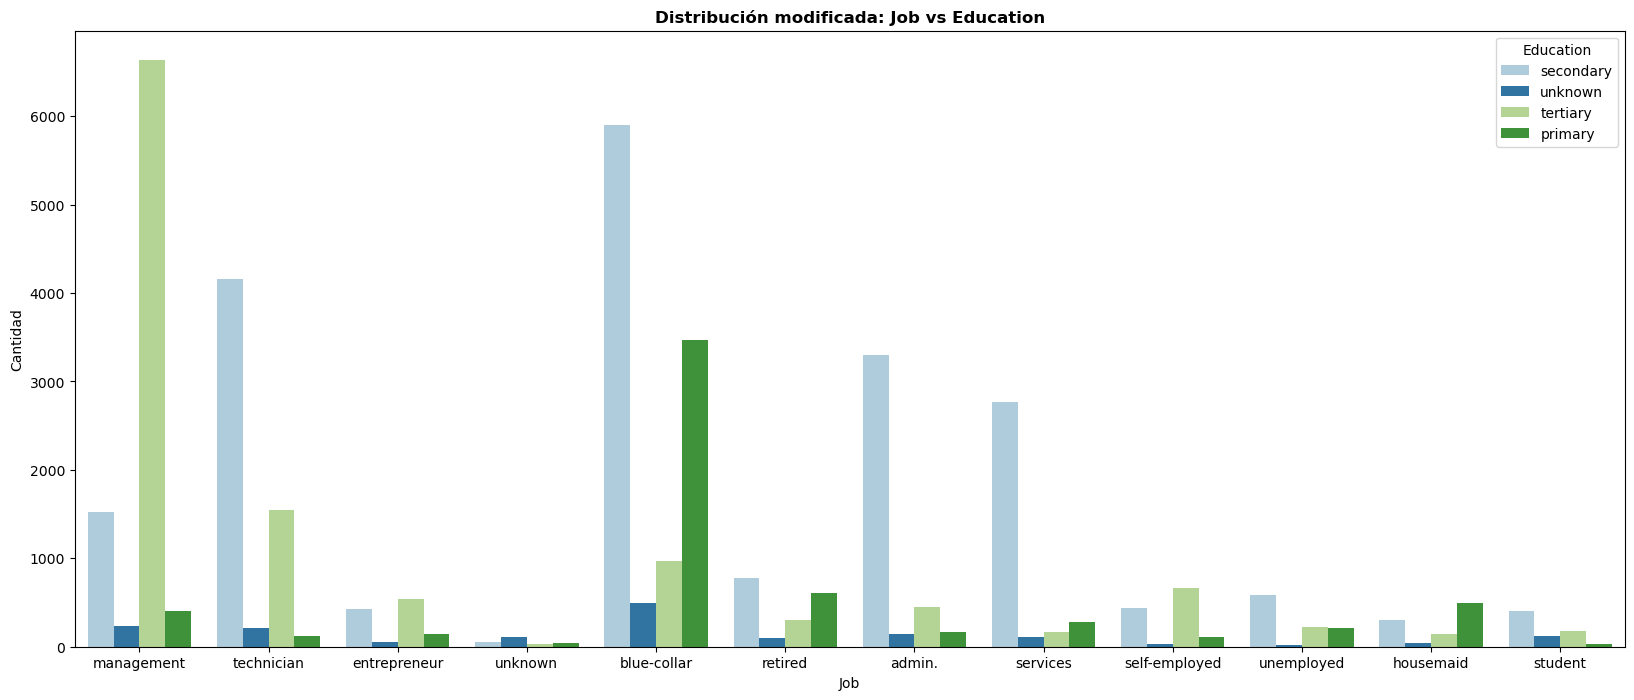

In [41]:
# se visualizan las variables Job vs Education 
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=bankdata_clean, x='Job', hue='Education', palette='Paired')
plt.title("Distribución modificada: Job vs Education",fontweight='bold')
plt.xlabel("Job")
plt.ylabel("Cantidad")

Para cada Job existe un valor de Education más frecuente. Se imputarán los valores nulos de Education siguiendo dicho criterio.

In [43]:
# Se imputan los Job = null con la moda de Job para cada Decil Balance (euros)
bankdata_clean['Education'] = bankdata_clean['Education'].fillna(bankdata_clean.groupby('Job')['Education'].transform(lambda x: x.mode()[0]))

# Verificación de Job sin nulls
bankdata_clean['Education'].isnull().sum() == 0

True

#### Variable numérica: Age

Text(0, 0.5, 'Cantidad')

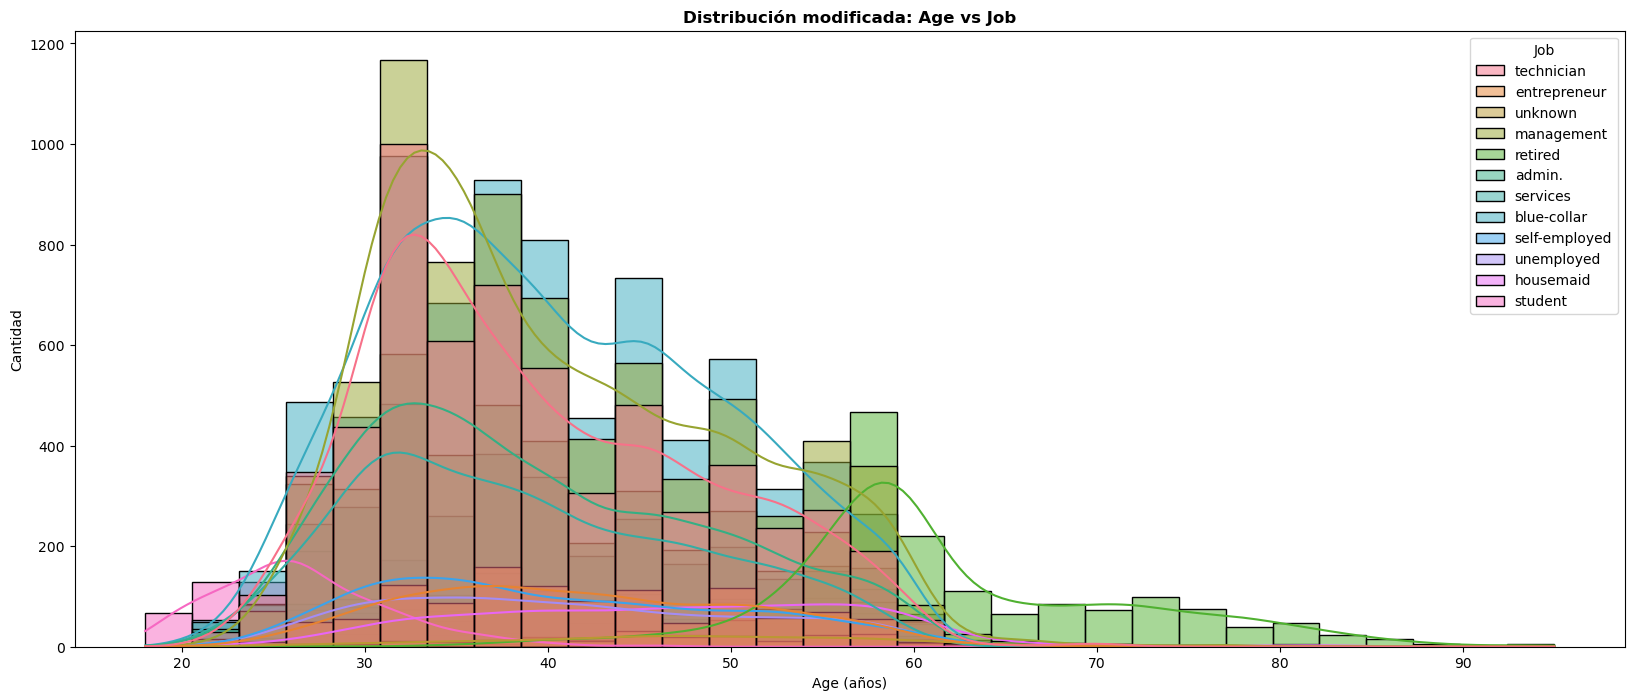

In [45]:
# visualizacion de la distribución de Age vs Job
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=bankdata, x='Age', bins=30, kde=True, hue='Job')
plt.title("Distribución modificada: Age vs Job",fontweight='bold')
plt.xlabel("Age (años)")
plt.ylabel("Cantidad")

La mediana de Age es distinta para cada Job. La principal diferencia se puede observar en los Job "student" y "retired". Lo comprobamos a continuación:

In [47]:
bankdata_clean.groupby('Job')['Age'].median().round(0)

Job
admin.           37.0
blue-collar      39.0
entrepreneur     41.0
housemaid        47.0
management       39.0
retired          59.0
self-employed    39.0
services         37.0
student          26.0
technician       37.0
unemployed       40.0
unknown          47.0
Name: Age, dtype: float64

Se reemplazarán los registros Age = null con la mediana de Age por Job.

In [49]:
# se imputan los Age = null con la mediana de Age por Job
bankdata_clean['Age'] = bankdata_clean['Age'].fillna(bankdata_clean.groupby('Job')['Age'].transform('median'))

# Verificación de Age sin nulls
bankdata_clean.Age.isnull().sum() == 0

True

#### Variable categórica: Marital Status

Text(0, 0.5, 'Cantidad')

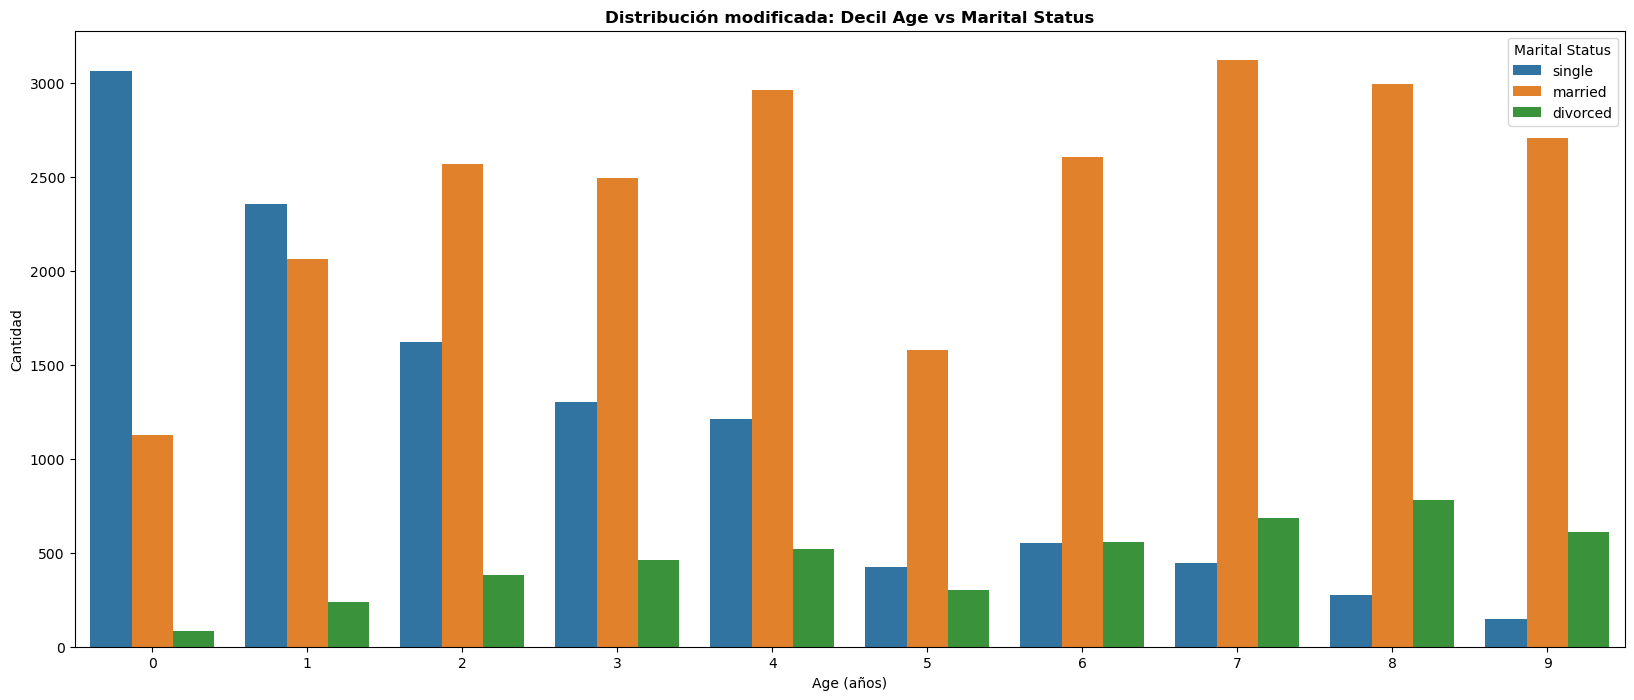

In [51]:
# se crea una variable que contiene el numero de decil de Age para cada usuario
bankdata_clean['Decil Age'] = pd.qcut(bankdata_clean['Age'], 10, labels=False)

# Se visualiza el Marital Status vs Decil Age
plt.figure(figsize=(20, 8))
sns.countplot(data=bankdata_clean, x='Decil Age', hue='Marital Status')
plt.title("Distribución modificada: Decil Age vs Marital Status",fontweight='bold')
plt.xlabel("Age (años)")
plt.ylabel("Cantidad")

En los deciles 0 y 1 de Age el Marital Status predominante es Single, mientras que en el resto de deciles, el Marital Status más frecuente con diferencia es Married. Se imputarán los Marital Status = null siguiendo dicho criterio.

In [53]:
# se imputan los Marital Status = null con la moda de Marital Status para cada Decil Age
bankdata_clean['Marital Status'] = bankdata_clean['Marital Status'].fillna(bankdata_clean.groupby('Decil Age')['Marital Status'].transform(lambda x: x.mode()[0]))

# verificacion de Marital Status sin nulls
bankdata_clean['Marital Status'].isnull().sum() == 0

True

#### Variable categórica: Housing Loan

Text(0, 0.5, 'Cantidad')

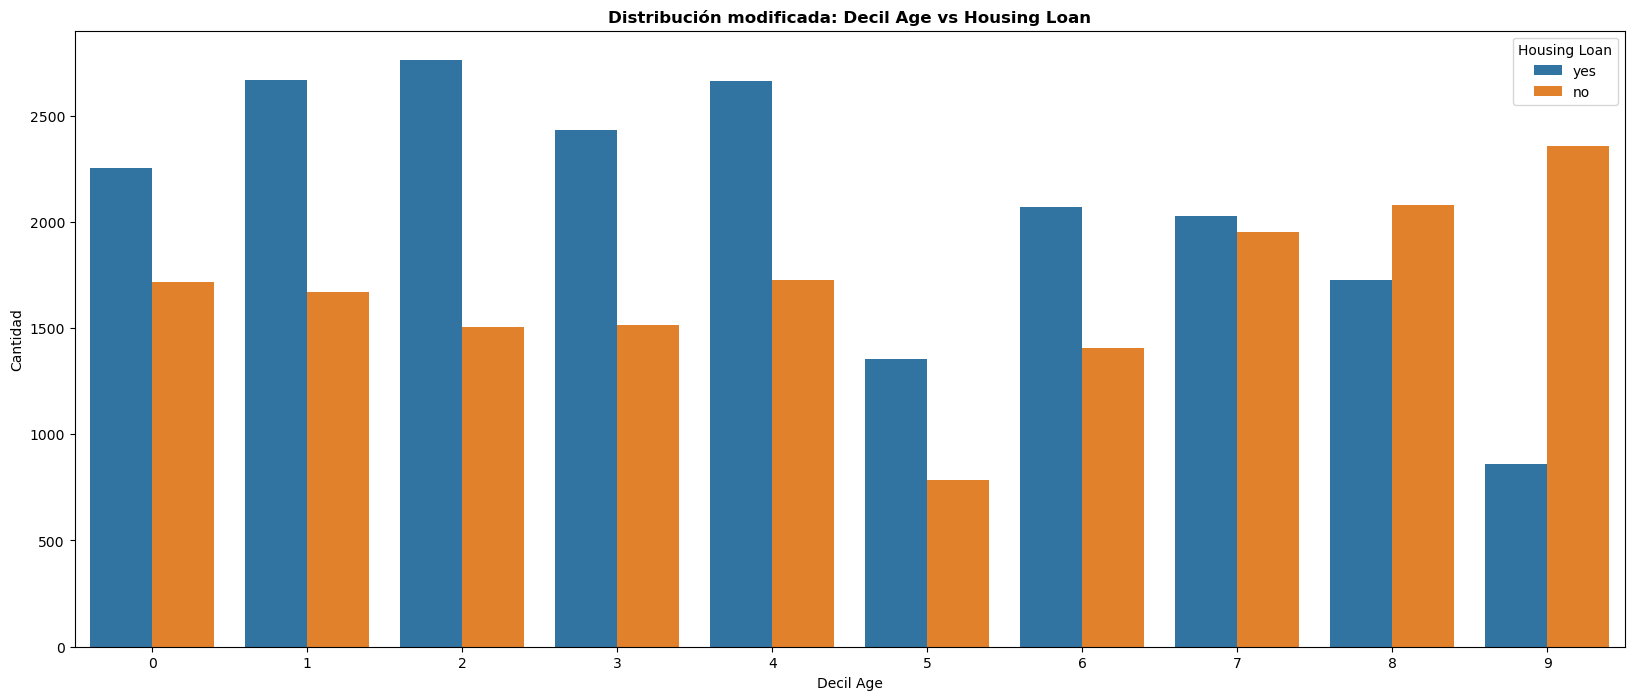

In [55]:
# Se visualiza la distribución de Personal Loan
plt.figure(figsize=(20, 8))
sns.countplot(data=bankdata_clean, x='Decil Age', hue='Housing Loan')
plt.title("Distribución modificada: Decil Age vs Housing Loan",fontweight='bold')
plt.xlabel("Decil Age")
plt.ylabel("Cantidad")

En los deciles 0 a 7 de Age el valor predominante de Housing Loan es yes, mientras que en el resto de deciles, el Housing Loan más frecuente es no. Se imputarán los Housing Loan = null siguiendo dicho criterio.

In [57]:
# se imputan los Housing Loan = null con la moda de Housing Loan para cada Decil Age
bankdata_clean['Housing Loan'] = bankdata_clean['Housing Loan'].fillna(bankdata_clean.groupby('Decil Age')['Housing Loan'].transform(lambda x: x.mode()[0]))

# Verificación de Housing Loan sin nulls
bankdata_clean['Housing Loan'].isnull().sum() == 0

True

#### Variable categórica: Credit

Proporción de usuarios con Credit = no: 98.19%


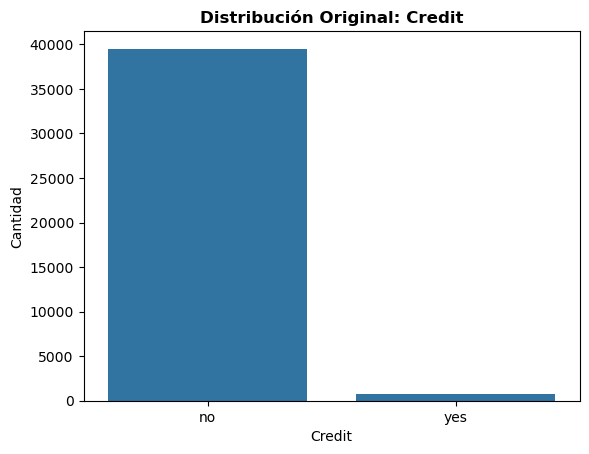

In [59]:
# se visualiza la distribución de Credit
sns.countplot(data=bankdata, x='Credit')
plt.title("Distribución Original: Credit",fontweight='bold')
plt.xlabel("Credit")
plt.ylabel("Cantidad")

# Proporción de usuarios con credit = no
prop_no_credit = bankdata.loc[bankdata['Credit'] == 'no', 'Credit'].count() / bankdata['Credit'].count() * 100
print(f'Proporción de usuarios con Credit = no: {prop_no_credit:.2f}%')

El 98% de los usuarios tienen Credit = no, por lo cual se reemplazarán los valores nulos de Credit con un valor de no.

In [61]:
# imputacion de los registros Credit = null con el valor no
bankdata_clean['Credit'] = bankdata_clean['Credit'].fillna('no')

# verificacion de Credit sin nulls
bankdata_clean['Credit'].isnull().sum() == 0

True

#### Variable categórica: Personal Loan

Proporción de usuarios con Credit = no: 84.04%


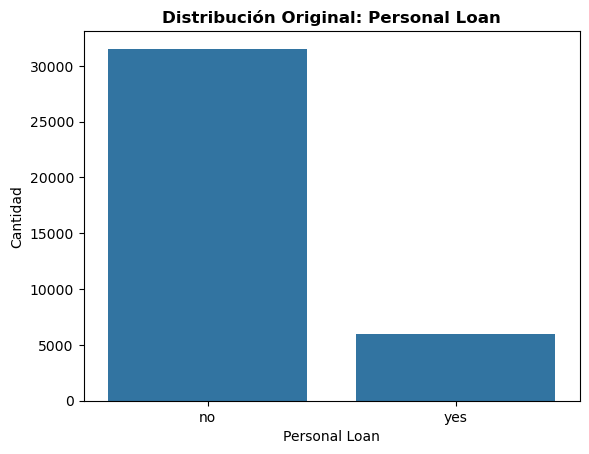

In [63]:
# Se visualiza la distribucion de Personal Loan
sns.countplot(data=bankdata, x='Personal Loan')
plt.title("Distribución Original: Personal Loan",fontweight='bold')
plt.xlabel("Personal Loan")
plt.ylabel("Cantidad")

# Proporción de usuarios con Personal Loan = no
prop_no_personal_loan = bankdata.loc[bankdata['Personal Loan'] == 'no', 'Personal Loan'].count() / bankdata['Personal Loan'].count() * 100
print(f'Proporción de usuarios con Credit = no: {prop_no_personal_loan:.2f}%')

El 84% de los usuarios tienen Personal Loan = no, por lo cual se reemplazarán los valores nulos de Personal Loan con un valor de no.

In [65]:
# imputación de los registros Perosnal Loan = null con el valor no
bankdata_clean['Personal Loan'] = bankdata_clean['Personal Loan'].fillna('no')

# verificación de Personal Loan sin nulls
bankdata_clean['Personal Loan'].isnull().sum() == 0

True

#### Verificación final de nulos

In [67]:
bankdata_clean.isnull().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
Decil Balance (euros)    0
Decil Age                0
dtype: int64

In [68]:
# se eliminan las columnas creadas para imputar los nulos
bankdata_clean = bankdata_clean.drop(['Decil Balance (euros)', 'Decil Age'], axis=1)

### Función con el preprocesamiento

Se define una función, que contiene todo el preprocesamiento efectuado sobre el dataset. Esta luego se utilizará en un pipeline para realizar el preprocesamiento de datos previo a la aplicación de los modelos de Machine Learning.

In [71]:
def preprocesamiento_datos(bankdata):
    # Manejo de variables numericas
    mask_pdays_1 = bankdata['Pdays'] == -1
    bankdata.loc[mask_pdays_1, 'Pdays'] = bankdata['Pdays'].max()
    
    bankdata_clean = bankdata.copy() # df con modificaciones
    
    # Imputacion de nulos
    
    # Pdays
    bankdata_clean['Pdays'] = bankdata_clean['Pdays'].fillna(bankdata['Pdays'].max())
    # Last Contact Duration
    bankdata_clean['Last Contact Duration'] = bankdata_clean['Last Contact Duration'].fillna(bankdata['Last Contact Duration'].median())
    # Balance (euros)
    bankdata_clean['Balance (euros)'] = bankdata_clean['Balance (euros)'].fillna(bankdata['Balance (euros)'].median())
    # Job
    bankdata_clean['Decil Balance (euros)'] = pd.qcut(bankdata_clean['Balance (euros)'], 10, labels=False)
    bankdata_clean['Job'] = bankdata_clean['Job'].fillna(bankdata_clean.groupby('Decil Balance (euros)')['Job'].transform(lambda x: x.mode()[0]))
    # Education
    bankdata_clean['Education'] = bankdata_clean['Education'].fillna(bankdata_clean.groupby('Job')['Education'].transform(lambda x: x.mode()[0]))
    # Age
    bankdata_clean['Age'] = bankdata_clean['Age'].fillna(bankdata_clean.groupby('Job')['Age'].transform('median'))
    # Marital Status
    bankdata_clean['Decil Age'] = pd.qcut(bankdata_clean['Age'], 10, labels=False)
    bankdata_clean['Marital Status'] = bankdata_clean['Marital Status'].fillna(bankdata_clean.groupby('Decil Age')['Marital Status'].transform(lambda x: x.mode()[0]))
    # Housing Loan
    bankdata_clean['Housing Loan'] = bankdata_clean['Housing Loan'].fillna(bankdata_clean.groupby('Decil Age')['Housing Loan'].transform(lambda x: x.mode()[0]))
    # Credit
    bankdata_clean['Credit'] = bankdata_clean['Credit'].fillna('no')
    # Personal Loan
    bankdata_clean['Personal Loan'] = bankdata_clean['Personal Loan'].fillna('no')

    # eliminacion de columnas auxiliares
    bankdata_clean = bankdata_clean.drop(['Decil Balance (euros)', 'Decil Age'], axis=1)
    
    return bankdata_clean

# se cargo nuevamente el datasate original
bankdata_original = pd.read_csv('bank_subscription.csv', sep=';')

# se aplica la funcion creada sobre el dataset original
bankdata_clean_2 = preprocesamiento_datos(bankdata_original)

# se verifica que el resultado de la funcion sea el mismo que todo el preprocesamiento efectuado
print(bankdata_clean.equals(bankdata_clean_2))

True


## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

 Una vez realizada la limpieza del dataset original, se procederá a realizar un análisis exploratorio para identificar correlaciones entre variables, distribuciones y posibles outliers.

### Matirz de correlación lineal

Text(95.7222222222222, 0.5, 'Features')

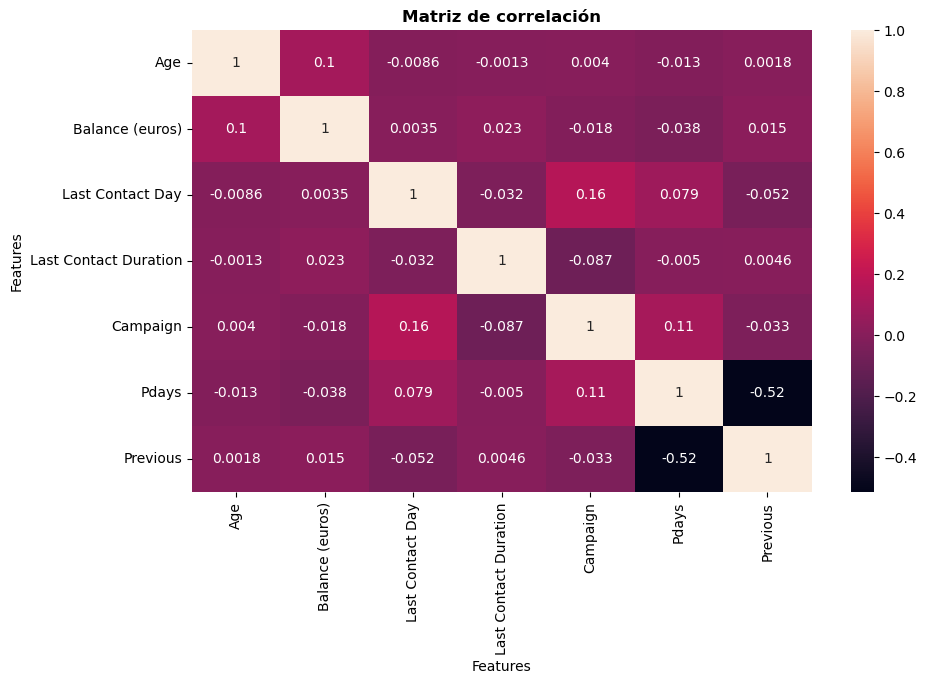

In [75]:
# se construye y visualiza la matriz de correlación con todas las variables númericas excepto subscription
bankdata_clean_sin_subscription = bankdata.drop(columns=['Subscription'])
matriz_correlacion = bankdata_clean_sin_subscription.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación",fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Features")

Se puede observar que la correlación lineal más fuerte se encuentra entre las variables **entre Pdays y Previuos**. Estas tienen una correlación negativa de 0.52, lo cual quiere decir que dentro del dataset cuantos más contactos previos a una campaña tuvo un cliente, menos días pasaron desde su último contacto.

### Correlación entre variables numéricas y Subscription

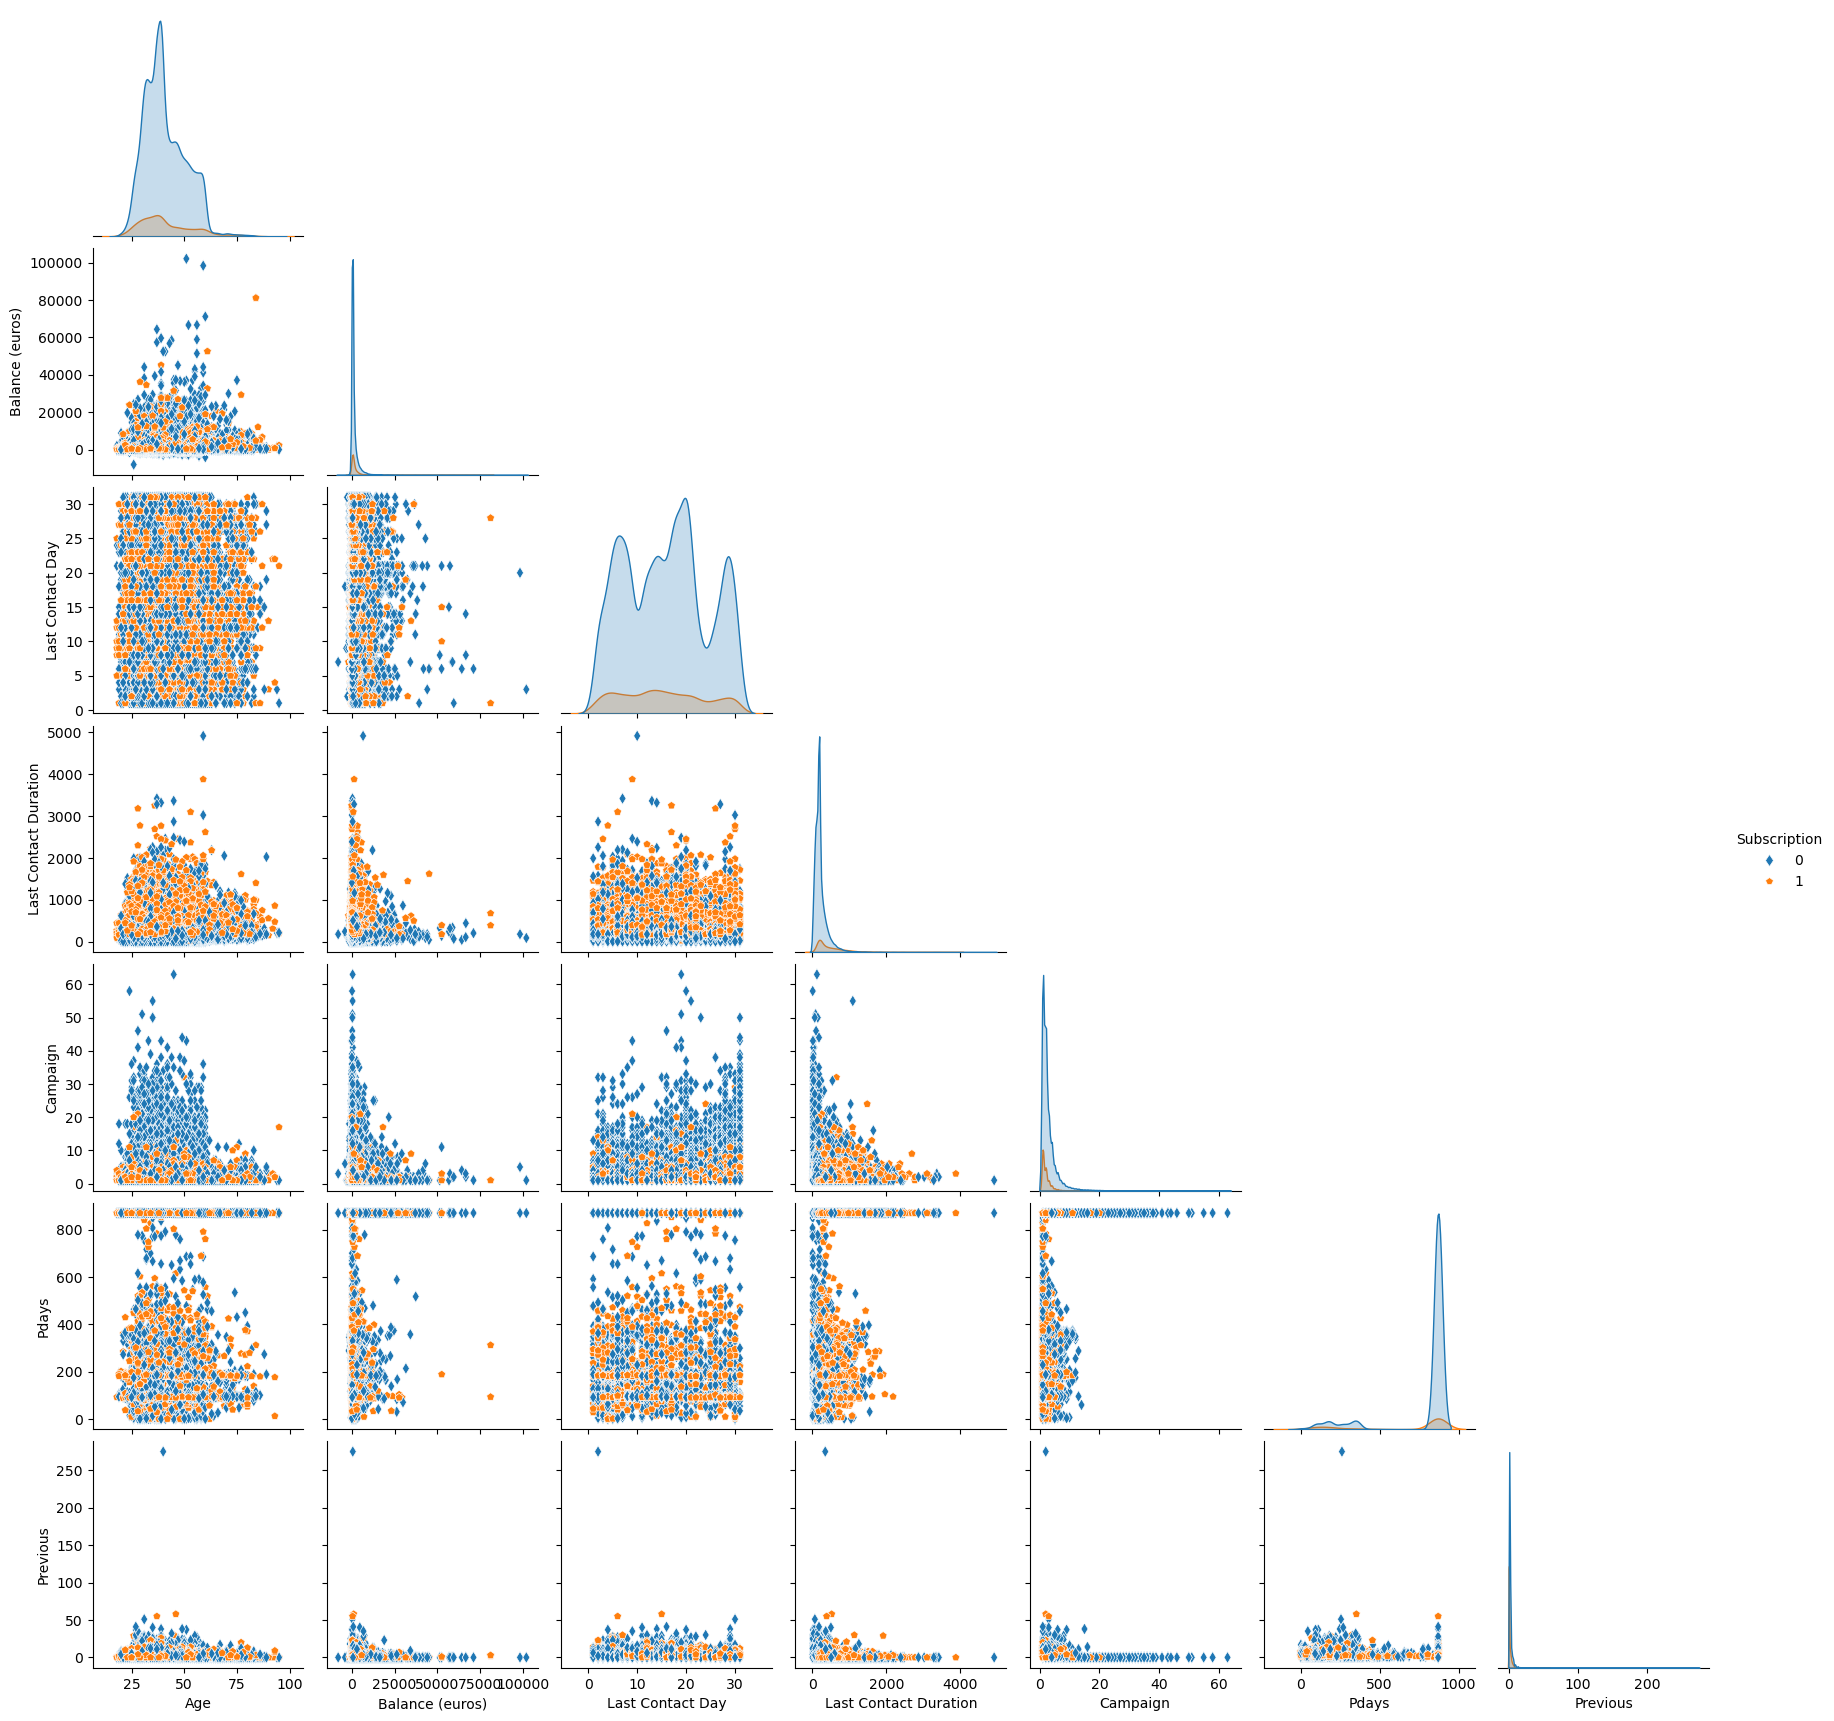

In [78]:
sns.pairplot(bankdata_clean,hue='Subscription', diag_kind = "kde", markers = ['d', 'p'], corner=True)

**Observaciones:**
En la diagonal del gráfico, se observa que en cada variable, la condicion de subscripción o no subscripción respeta la misma distribución por lo que ninguna por si sola es relevante para explicar el comportamiento de los datos.
En los graficos de feature vs feature numéricas se observan 2 que muestran cierta separación en la densidad de los usuarios subscriptos contra los que no están subscriptos.Estos se presentan en detalle a continuación:

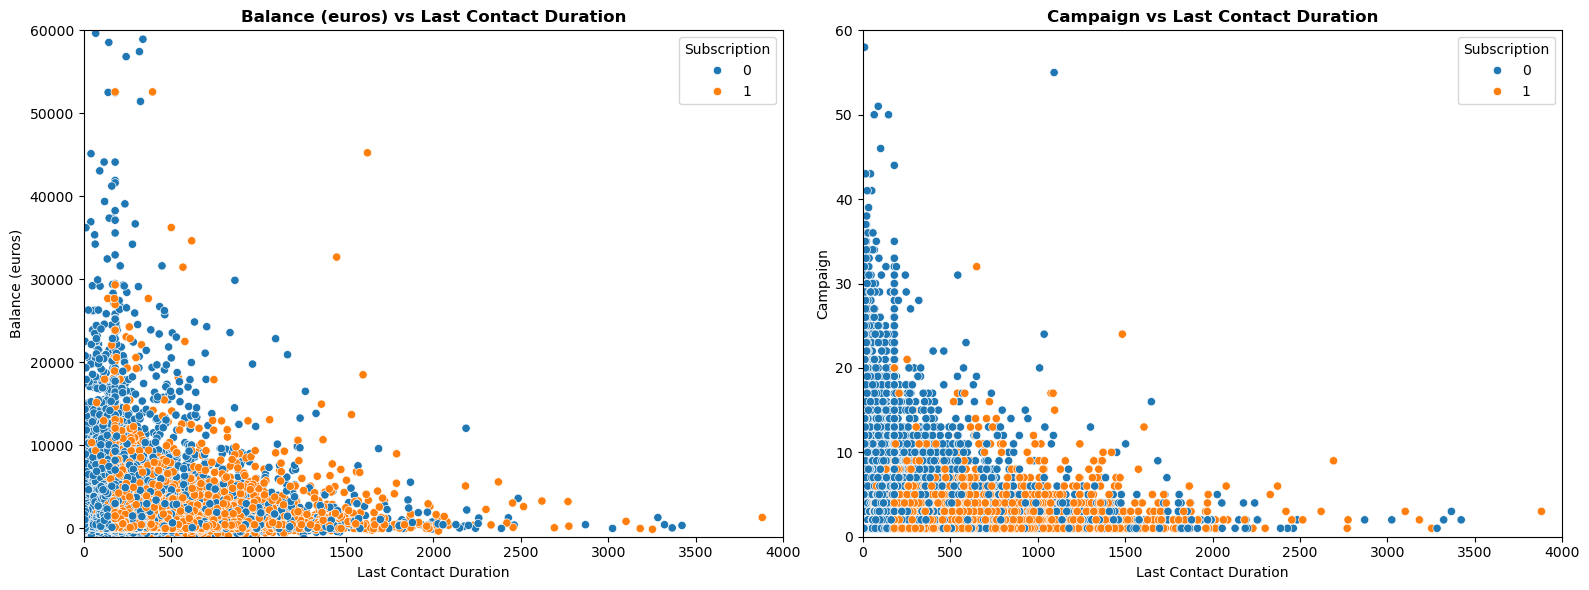

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.scatterplot(bankdata_clean,
            hue='Subscription',
            x='Last Contact Duration',y='Balance (euros)',
            palette='tab10',
            ax=axes[0]
               )
axes[0].set_xlim(0, 4000)
axes[0].set_ylim(-1000, 60000)
axes[0].set_title("Balance (euros) vs Last Contact Duration", fontweight='bold')
axes[0].set_xlabel("Last Contact Duration")
axes[0].set_ylabel("Balance (euros)")

sns.scatterplot(bankdata_clean,
            hue='Subscription',
            x='Last Contact Duration',y='Campaign',
            palette='tab10',
            ax=axes[1]
               )
axes[1].set_xlim(0, 4000)
axes[1].set_ylim(0, 60)
axes[1].set_title("Campaign vs Last Contact Duration", fontweight='bold')
axes[1].set_xlabel("Last Contact Duration")
axes[1].set_ylabel("Campaign")
plt.tight_layout()
plt.show()

- **Balance (euros) vs Last Contact Duration:** Se puede ver una mayor acumulación de clientes que se subscribieron (Subscription = 1) cuando su promedio de saldo en cuenta anual era bajo (Balance (euros))), de menos de 10.000 euros, y cuando la duración del último contacto con el cliente (Last Contact Duration) fue menor a aproximadamente 12.000 segundos.
- **Campaign vs Last Contact Duration:** Se puede ver una mayor acumulación de clientes que se subscribieron (Subscription = 1) cuando la cantidad de contactos al cliente durante la campaña (Campaign) fue menor a 10 veces, y cuando la duración del último contacto con el cliente (Last Contact Duration) fue menor a aproximadamente 15.000 segundos.

### Boxplots de variables numéricas vs categóricas

C:\Users\GMA207\AppData\Local\Temp\ipykernel_3336\3441311659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=bankdata_clean, x='Job', y='Age', palette = "tab10")


Text(0, 0.5, 'Balance(euros)')

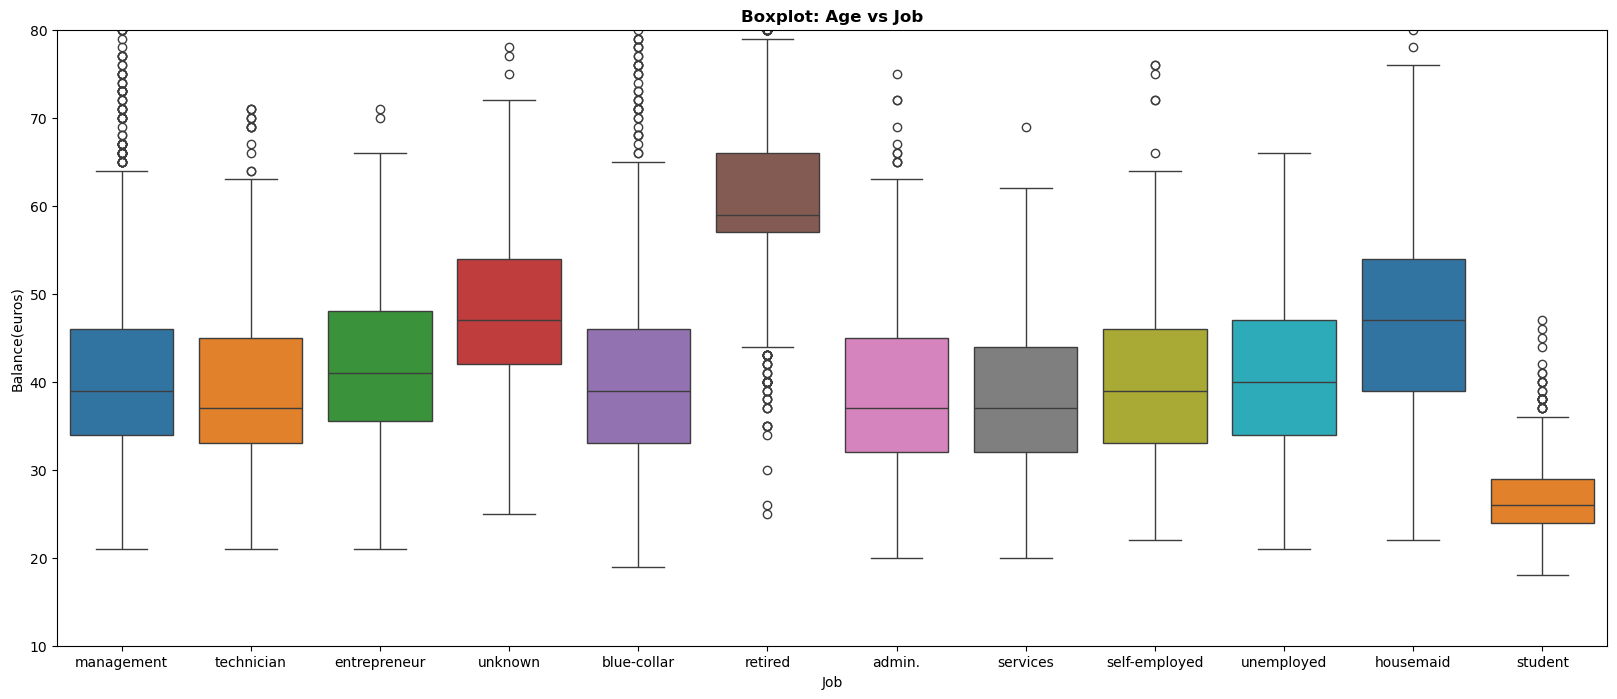

In [83]:
# visualizacion de boxplot de Age vs Job
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=bankdata_clean, x='Job', y='Age', palette = "tab10")
plt.ylim(10, 80)
plt.title("Boxplot: Age vs Job",fontweight='bold')
plt.xlabel("Job")
plt.ylabel("Balance(euros)")

**Observaciones:** Se puede observar que la edad mínima de los clientes en cada Job es muy similar a excepción del Job = retired. Siendo esta una relación lógica ya que el Job = retired hace referencia al fin de la vida laboral "formal" de un cliente. 
Por otro lado, la edad máxima y mediana en cada Job es bastante dispareja, y particularmente hay una que es bastante menor al resto, que es cuando Job = student. Otra vez, esta relación es coherente ya que las personas dejan de ser estudiantes a una edad más temprana comparado con la edad en la que siguen o dejan de trabajar.

C:\Users\GMA207\AppData\Local\Temp\ipykernel_3336\2509722062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=bankdata_clean, x='Education', y='Balance (euros)', palette = "tab10")


Text(0, 0.5, 'Balance(euros)')

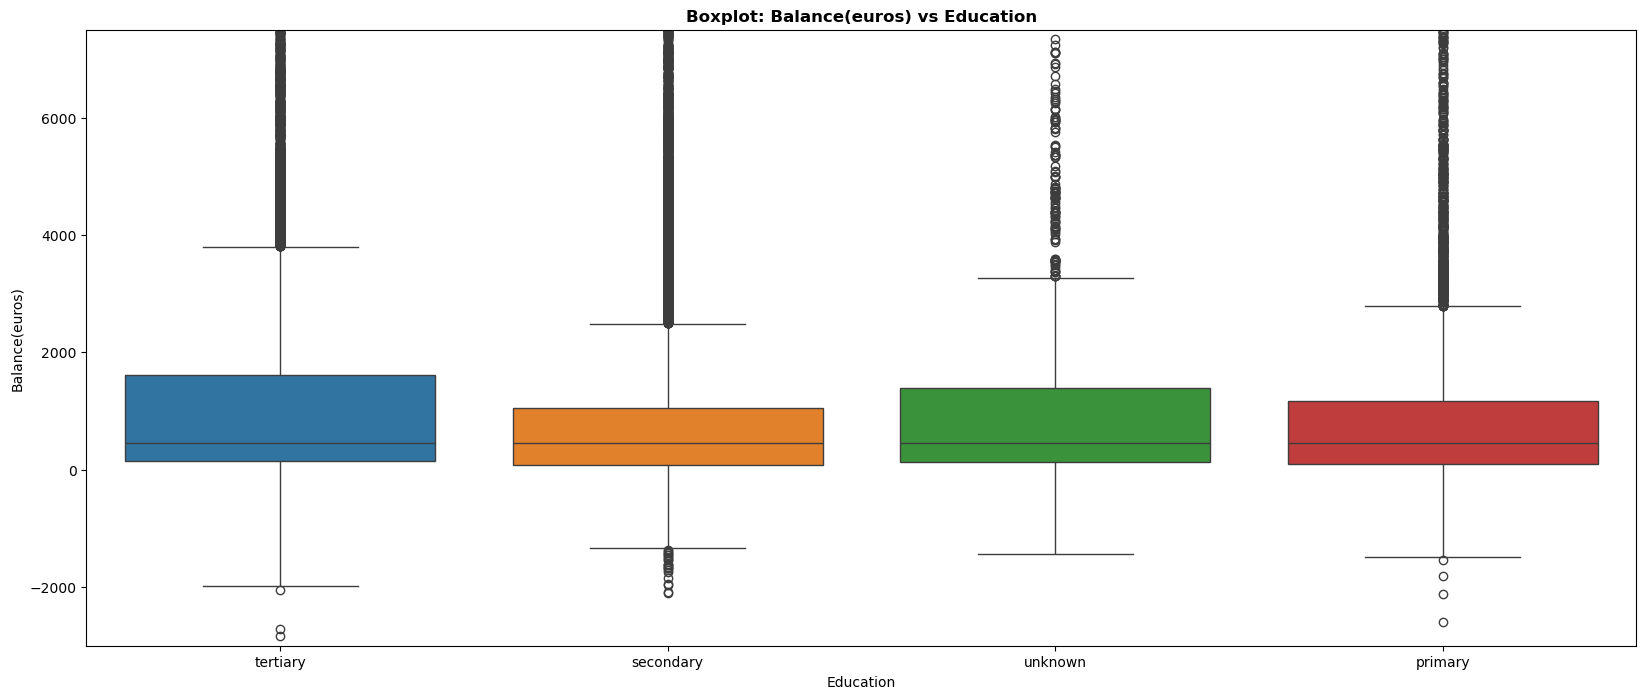

In [85]:
# visualizacion de boxplot de Balance (euros) vs Education
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=bankdata_clean, x='Education', y='Balance (euros)', palette = "tab10")
plt.ylim(-3000, 7500)
plt.title("Boxplot: Balance(euros) vs Education",fontweight='bold')
plt.xlabel("Education")
plt.ylabel("Balance(euros)")

**Observaciones:** Se puede observar que la mediana del promedio del saldo anual en cuenta de los clientes es muy similar en todos los niveles de educación. Aun así, particularmente el máximo nivel de estudios presente en el dataset (tertiary) es el que contiene una mayor cantidad de clientes en los cuartiles 3 y 4 con mayor saldo promedio anual.
Por otro lado, en los boxplots de cada clase de Education parece haber varios outliers sobre el cuarto cuartil, si embargo, consideramos que esta puede tomarse como una variación natural de los datos ya que tener un determinado nivel de estudios no necesariamente implicaría tener un mayor o menor promedio de saldo anual en cuenta.

### Variable Target

Finalmente, veremos como se distribuyen los datos de la variable Subscription, que se buscará predecir mediante el entrenamiento de un modelo de clasificación.

Proporción de usuarios con Subscription = 0: 88.30%


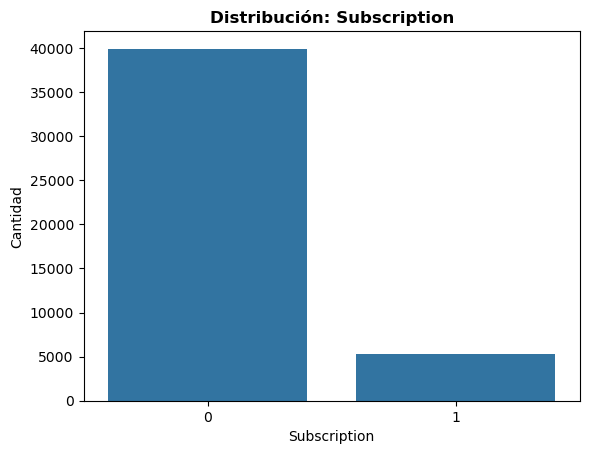

In [88]:
# Se visualiza la distribucion de Subscription
sns.countplot(data=bankdata_clean, x='Subscription')
plt.title("Distribución: Subscription",fontweight='bold')
plt.xlabel("Subscription")
plt.ylabel("Cantidad")

# Proporción de usuarios con Personal Loan = no
prop_subscription_0 = bankdata_clean.loc[bankdata_clean['Subscription'] == 0, 'Subscription'].count() / bankdata['Subscription'].count() * 100
print(f'Proporción de usuarios con Subscription = 0: {prop_subscription_0:.2f}%')

**Observaciones:** el 88.3% de los datos de Subscription tienen un valor de 0. Quiere decir que el dataset presenta muy pocos registros con Subscription = 1, y esto puede afectar negativamente a la busqueda de un buen clasificador de dicha clase en particular, porque un modelo cuya predicción sea siempre Subscription = 0, tenderá a ser muy bueno a pesar de no detectar de forma acertada a los Subscription = 1.

# MACHINE LEARNING

### Split del dataset en set "Train" y "Test"

In [92]:
# variable a predecir (target)
y = bankdata['Subscription']

# variables predictoras (features)
x = bankdata.drop(columns=['Subscription'])

# Train Test Split
semilla = 42
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.80, random_state=semilla)

### Variables categóricas y numéricas

In [94]:
# variables numericas
variables_num = list(x.select_dtypes(include='number').columns)

# variables categoricas
variables_cat = list(x.select_dtypes(include='object').columns)

print(f'Variables numéricas:\n{variables_num}')
print(f'\nVariables categóricas:\n{variables_cat}')

Variables numéricas:
['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration', 'Campaign', 'Pdays', 'Previous']

Variables categóricas:
['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']


## PIPELINE 1: SIN PCA

### Steps del pipeline

In [97]:
# step 1: preprocesamiento
step_1 =  FunctionTransformer(preprocesamiento_datos, validate=False)

# step 2: StandardScaler para variables numericas y OneHotEncoding para variables categoricas
step_2 = ColumnTransformer( transformers=[
                                            ('num', StandardScaler(), variables_num),  # StandardScaler sobre variables numericas
                                            ('cat', OneHotEncoder(), variables_cat)   # OneHotEncoding sobre las variables categóricas (dummies)
                                            ])
# step 3: Aplicacion del modelo. Aqui lo inicializamos con LogisticRegression() pero en GridSearch se probara SVM tambien
step_3 = LogisticRegression()

pipeline = Pipeline([
                        ('preprocesamiento', step_1),
                        ('features', step_2),
                        ("estimador", step_3)
                    ])
# visualizacion de los steps que conforman al pipeline
pipeline

Pipeline(steps=[('preprocesamiento',
                 FunctionTransformer(func=<function preprocesamiento_datos at 0x0000016CCCDA3920>)),
                ('features',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Day',
                                                   'Last Contact Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan', 'Contact',
                                                   'Last Contact Month',
                                                   'Poutcome'])])),
                ('estimador', LogisticRegression())])

### Entrenamiento de modelos e hiperparámetros utilizando el pipeline con GridSearch y CrossValidation (GSCV)

Al tratarse de un problema de clasificación donde se quiere predecir si un cliente se va a subscribir o no a una campaña de marketing, los modelos a probar serán: 
- **Regresión Logística**
- **Support Vector Machine**

In [100]:
# modelos e hiperparametros a probar con GSCV
parametros = [
                {   # Regresio logística
                    "estimador": (LogisticRegression(),),
                    "estimador__C": (100,10, 1)
                }, 
    
                {
                    "estimador": (SVC(probability=True),),
                    "estimador__kernel":['rbf'], 
                    "estimador__C":(5, 50, 500), 
                    "estimador__gamma":( 0.1, 0.01, 0.001)          
                }
            ]

# se define el GSCV: 
grid_search = GridSearchCV( pipeline, 
                            parametros,
                            refit = True, # para que devuelva el modelo con los mejores parametros encontrados 
                            cv = 3, # cantidad de folds
                            verbose=1,
                            n_jobs=-1)

# entrenamiento los modelos con GSCV para encontrar al mejor
grid_search.fit(xtrain, ytrain.values.ravel())

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        FunctionTransformer(func=<function preprocesamiento_datos at 0x0000016CCCDA3920>)),
                                       ('features',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Balance '
                                                                          '(euros)',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Day',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Duration',
                                                                          'Campaign',
                                                                          'Pdays',
                                                                          'Previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Job',
                                                                          'Ma...
                                                                          'Credit',
                                                                          'Housing '
                                                                          'Loan',
                                                                          'Personal '
                                                                          'Loan',
                                                                          'Contact',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Month',
                                                                          'Poutcome'])])),
                                       ('estimador', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'estimador': (LogisticRegression(),),
                          'estimador__C': (100, 10, 1)},
                         {'estimador': (SVC(probability=True),),
                          'estimador__C': (5, 50, 500),
                          'estimador__gamma': (0.1, 0.01, 0.001),
                          'estimador__kernel': ['rbf']}],
             verbose=1)

### Resultados: Métricas

In [102]:
# obtengo las caracteristicas del mejor modelo obtenido 
grid_search.best_params_

{'estimador': LogisticRegression(), 'estimador__C': 100}

Como resultado del pipeline sin PCA utilizando GSCV se obtuvo que el mejor modelo para predecir fue el de **Regresión Logística** con un parámtro **C (costo) = 10**.

In [104]:
# obtengo el accuracy en train del mejor modelo
aucc_train_1 = round(grid_search.best_score_, 4)

# prediccion sobre las muestras de test utilizando el mejor modelo
ypred = grid_search.predict(xtest)

# calculo del acuracy en test (comparacion de ytest vs ypred)
test_acc_1 = round(accuracy_score(ytest, ypred),4)

# calculo del area (AUC) sobre la curva ROC
yproba = grid_search.predict_proba(xtest)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc_value_1 = round(auc(fpr1, tpr1),4)

# calculo de sensitivity y specificity con matriz de coconfusion de coconfusion
matriz_confusion_1 = confusion_matrix(ytest, ypred)
sensitivity_subscripcion_1 = round(matriz_confusion_1[1,1] / (matriz_confusion_1[1,0] + matriz_confusion_1[1,1]) , 4)
specificity_no_subscripcion_1 = round(matriz_confusion_1[0,0] / (matriz_confusion_1[0,0] + matriz_confusion_1[0,1]) , 4)

# guardo los resultados en un dataframe
resultados = pd.DataFrame({'Modelo sin PCA' : {'Accuracy train':aucc_train_1, 'Accuracy test':test_acc_1, 'AUC':auc_value_1, 'Sensitivity':sensitivity_subscripcion_1, 'Specificity':specificity_no_subscripcion_1 }})
resultados

Modelo sin PCA
Accuracy train          0.9015
Accuracy test           0.9002
AUC                     0.8760
Sensitivity             0.3275
Specificity             0.9760

**Observaciones:**
- Tanto el accuracy como el AUC son cercanos a 1, con lo cual en principio parece ser que el modelo hace una buena predicción de la variable subscrpción.
- El accuracy en train y en test es muy similar y con valores cercanos a 1, por lo que se podría decir que no hay grandes errores de Bias ni Variance.
- El specificity tiene un valor muy cercano a 1, lo que quiere decir que el modelo clasifica muy bien cuando un usuario **no se subscribe**. Contrariamente, el sensitivity tiene un valor muy bajo y esto quiere decir que el modelo no está logrando detectar de forma acertada a los usuarios que **se subscriben**. Esto parece ser a priori por la naturaleza del dataset utilizado, ya que como se mostrará a continuación, la gran mayoria de clientes del dataset tienen subscription = 0 y esto dificulta el entrenamiento del modelo a la hora de detectar la clase subscription = 0.

In [106]:
# proporicon de clases en Subscription
bankdata['Subscription'].value_counts() / bankdata.shape[0] * 100

Subscription
0    88.30152
1    11.69848
Name: count, dtype: float64

Aproximadamente el 88% de los clientes del dataset tienen subscrption = 0 y solo el 12% tienen subscription = 1

### Resultados: Gráficos

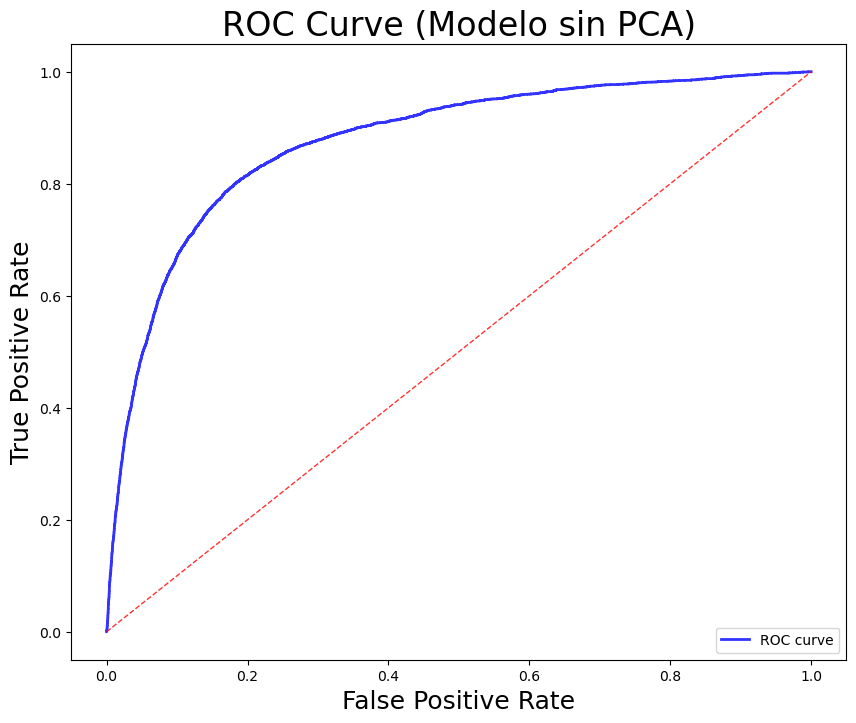

In [109]:
plt.figure(figsize = (10,8))
plt.plot(fpr1, tpr1, lw=2, alpha=0.8 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC Curve (Modelo sin PCA)',fontsize=24)
plt.show()

La forma de la curva ROC tiene una forma considerablemente más cercana a la ideal donde el área debajo de ella es igual a 1 que a la peor de las situaciones (rojo) donde la probabilidad de clasificar bien es del 50% (igual que arrojar una moneda).

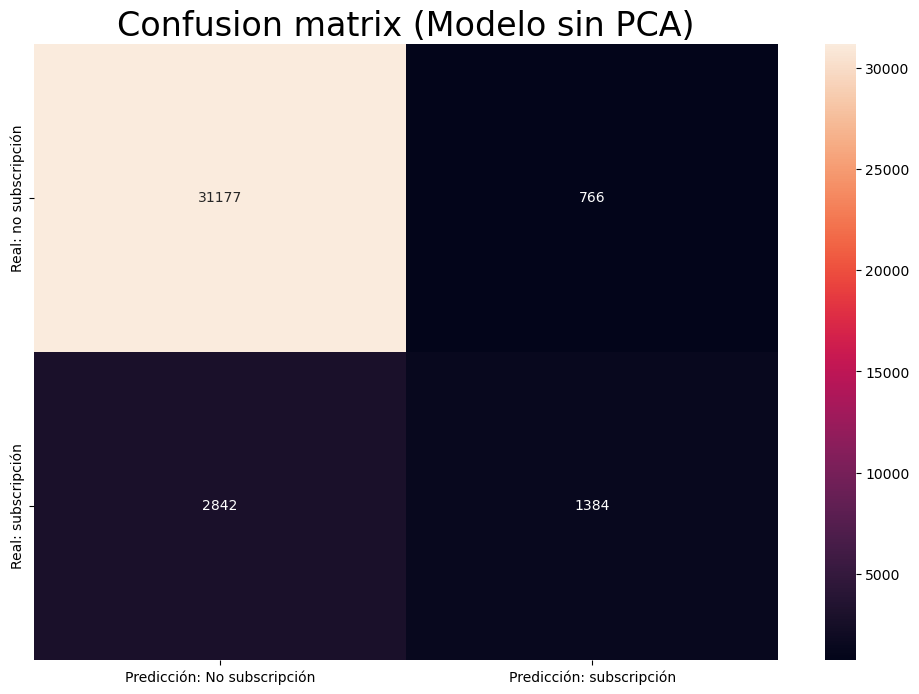

In [111]:
# Compute Confusion Matrix
cm = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(cm,index = ['Real: no subscripción', 'Real: subscripción'], columns = ['Predicción: No subscripción', 'Predicción: subscripción'])
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Confusion matrix (Modelo sin PCA)',fontsize=24)
plt.show()

Se puede visualizar que la gran mayoria de las predicciones se encuentran en la diagonal conformada por los **True positive** y **True Negative**, lo cual habla de un **buen accuracy** del modelo encontrado. Pero también se evidencia un **Sensitivity bajo**, que tal y como se mencionó anteriormente, quiere decir que el modelo no clasifica de forma acertiva a las "subscripciones"

## PIPELINE 2: CON PCA

### Steps del pipeline

In [115]:
# step 1: preprocesamiento
step_1 =  FunctionTransformer(preprocesamiento_datos, validate=False)

# step 2: StandardScaler para variables numericas y OneHotEncoding para variables categoricas
step_2 = ColumnTransformer( transformers=[
                                            ('num', StandardScaler(), variables_num),  # StandardScaler sobre variables numericas
                                            ('cat', OneHotEncoder(), variables_cat)   # OneHotEncoding sobre las variables categóricas (dummies)
                                            ])
# step 3: Aplicacion del modelo. Aqui lo inicializamos con LogisticRegression() pero en GridSearch se probara SVM tambien
step_3 = LogisticRegression()

# step 4: reduccion de la dimensionalidad con n_components = 10
step_4 = PCA(n_components= 10)

pipeline_pca =Pipeline([
                        ('preprocesamiento', step_1),
                        ('features', step_2),
                        ("reducciondim", step_4),
                        ("estimador", step_3)

                    ])
# visualizacion de los steps que conforman al pipeline
pipeline_pca

Pipeline(steps=[('preprocesamiento',
                 FunctionTransformer(func=<function preprocesamiento_datos at 0x0000016CCCDA3920>)),
                ('features',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Day',
                                                   'Last Contact Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan', 'Contact',
                                                   'Last Contact Month',
                                                   'Poutcome'])])),
                ('reducciondim', PCA(n_components=10)),
                ('estimador', LogisticRegression())])

### Entrenamiento de modelos e hiperparámetros utilizando el pipeline con GridSearch y CrossValidation (GSCV)

In [117]:
# modelos e hiperparametros a probar con GSCV
parametros = [
                {
                    "estimador": (LogisticRegression(),),
                    "estimador__C": (0.1,1,10)
                }, 
            
                {
                    "estimador": (SVC(probability=True),),
                    "estimador__kernel":['linear'], 
                    "estimador__C":(1, 5, 10), 
                    "estimador__gamma":( 0.1, 0.01)          
                }
            ]
    

# creamos el GSCV: 
grid_search_pca = GridSearchCV( pipeline_pca, 
                                parametros,
                                refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                                cv = 3, # cv indica la cantidad de folds
                                verbose=1,
                                n_jobs=-1)

# entrenamiento los modelos con GSCV para encontrar al mejor
grid_search_pca.fit(xtrain, ytrain.values.ravel())

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        FunctionTransformer(func=<function preprocesamiento_datos at 0x0000016CCCDA3920>)),
                                       ('features',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Balance '
                                                                          '(euros)',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Day',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Duration',
                                                                          'Campaign',
                                                                          'Pdays',
                                                                          'Previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Job',
                                                                          'Ma...
                                                                          'Loan',
                                                                          'Contact',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Month',
                                                                          'Poutcome'])])),
                                       ('reducciondim', PCA(n_components=10)),
                                       ('estimador', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'estimador': (LogisticRegression(),),
                          'estimador__C': (0.1, 1, 10)},
                         {'estimador': (SVC(probability=True),),
                          'estimador__C': (1, 5, 10),
                          'estimador__gamma': (0.1, 0.01),
                          'estimador__kernel': ['linear']}],
             verbose=1)

### Resultados: Métricas

In [119]:
# obtengo las caracteristicas del mejor modelo obtenido 
grid_search_pca.best_params_

{'estimador': LogisticRegression(), 'estimador__C': 10}

Como resultado del pipeline con PCA (n_components = 10) utilizando GSCV se obtuvo que el mejor modelo para predecir fue el de **Regresión Logística** con un parámtro **C (costo) = 10**.

**Aclaración:** El n_compontents = 10 se definió luego de probar distintos valores tales como 5,15,20,25, 30 y 40. EL valor de 10 es el que mantiene un buen accuracy, similar al modelo sin PCA, pero utilizando solo el 62% de las columnas del dataset "bankdata" original (tiene 16 sin contar la variable target).

In [121]:
# obtengo el accuracy en train del mejor modelo
aucc_train_2 = round(grid_search_pca.best_score_, 4)

# prediccion sobre las muestras de test utilizando el mejor modelo
ypred_2 = grid_search_pca.predict(xtest)

# calculo del acuracy en test (comparacion de ytest vs ypred_2)
test_acc_2 = round(accuracy_score(ytest, ypred_2),4)

# calculo del area (AUC) sobre la curva ROC
yproba = grid_search_pca.predict_proba(xtest)
fpr2, tpr2, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc_value_2 = round(auc(fpr2, tpr2),4)

# calculo de sensitivity y specificity con matriz de coconfusion de coconfusion
matriz_confusion_2 = confusion_matrix(ytest, ypred_2)
sensitivity_subscripcion_2 = round(matriz_confusion_2[1,1] / (matriz_confusion_2[1,0] + matriz_confusion_2[1,1]) , 4)
specificity_no_subscripcion_2 = round(matriz_confusion_2[0,0] / (matriz_confusion_2[0,0] + matriz_confusion_2[0,1]) , 4)

resultados['Modelo con PCA [n=10]'] = [aucc_train_2, test_acc_2, auc_value_2, sensitivity_subscripcion_2, specificity_no_subscripcion_2]

resultados

Modelo sin PCA  Modelo con PCA [n=10]
Accuracy train          0.9015                 0.8950
Accuracy test           0.9002                 0.8894
AUC                     0.8760                 0.8398
Sensitivity             0.3275                 0.1876
Specificity             0.9760                 0.9823

**Observaciones:**
- Con un 62% de las columnas del dataset original, el modelo con PCA obtiene valores de **accuracy muy similares** a los alcanzados por el modelo sin PCA.
- A pensar de que la diferencia entre el accuracy en train y test del modelo con PCA es mayor a la del modelo sin PCA, esta sigue siendo poco significativa. Por ende, se podría decir que este modelo tampoco tiene grandes errores por Bias y Variance.
- El **área AUC bajo la curva ROC del modelo con PCA es siginifcativamente menor a la de la del modelo sin PCA**. Esto quiere decir, que el modelo con PCA clasifica peor a medida que la función del clasificador encontrado se mueve en la dirección de alguna de las clases de la variable Subscription (variable target).
- En línea con el punto anterior, se puede observar que si bien el modelo con PCA tiene un **specificity levemente superior** que el modelo sin PCA, el **sensitivity es considerablemente peor**. Puntualmente, es practicamente un 50% menor al modelo sin PCA, y esto quiere decir, que el modelo con PCA es peor a la hora de identificar si un cliente tendrá Subscription = 1.

### Resultados: Gráficos

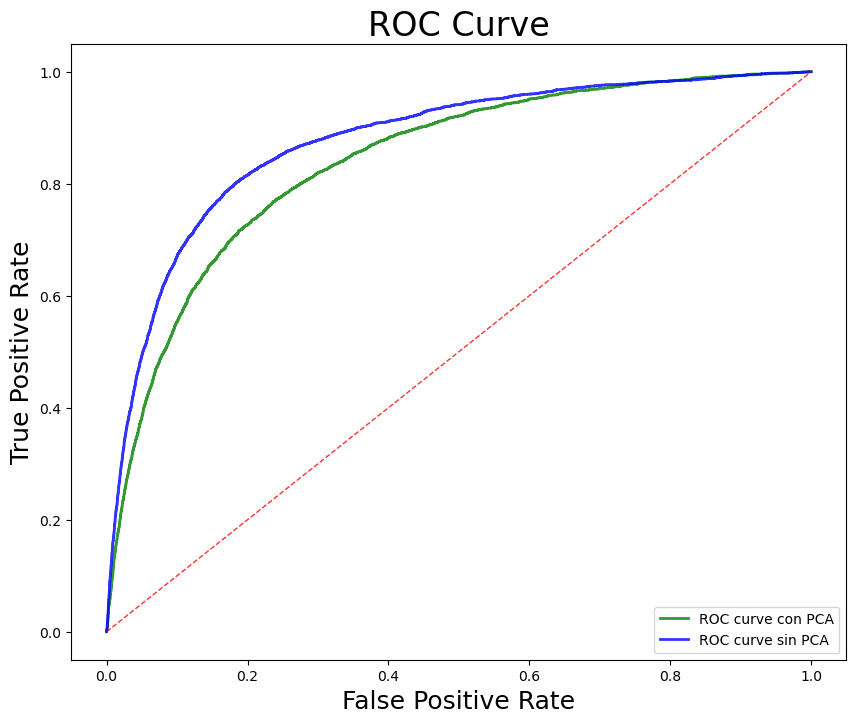

In [124]:
# grafico de curva ROC del modelo con PCA y sin PCA
plt.figure(figsize = (10,8))
plt.title('ROC Curve',fontsize=24)

plt.plot(fpr2, tpr2, lw=2, alpha=0.8 , label = 'ROC curve con PCA', color = 'g')
plt.plot(fpr1, tpr1, lw=2, alpha=0.8 , label = 'ROC curve sin PCA', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)

plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.legend(loc="lower right")

La curva ROC de ambos modelos es similar y más cercana a la ideal que a la peor solución (roja). Aun así, se puede observar que **es mejor la curva ROC del modelo sin PCA que la del modelo con PCA**.

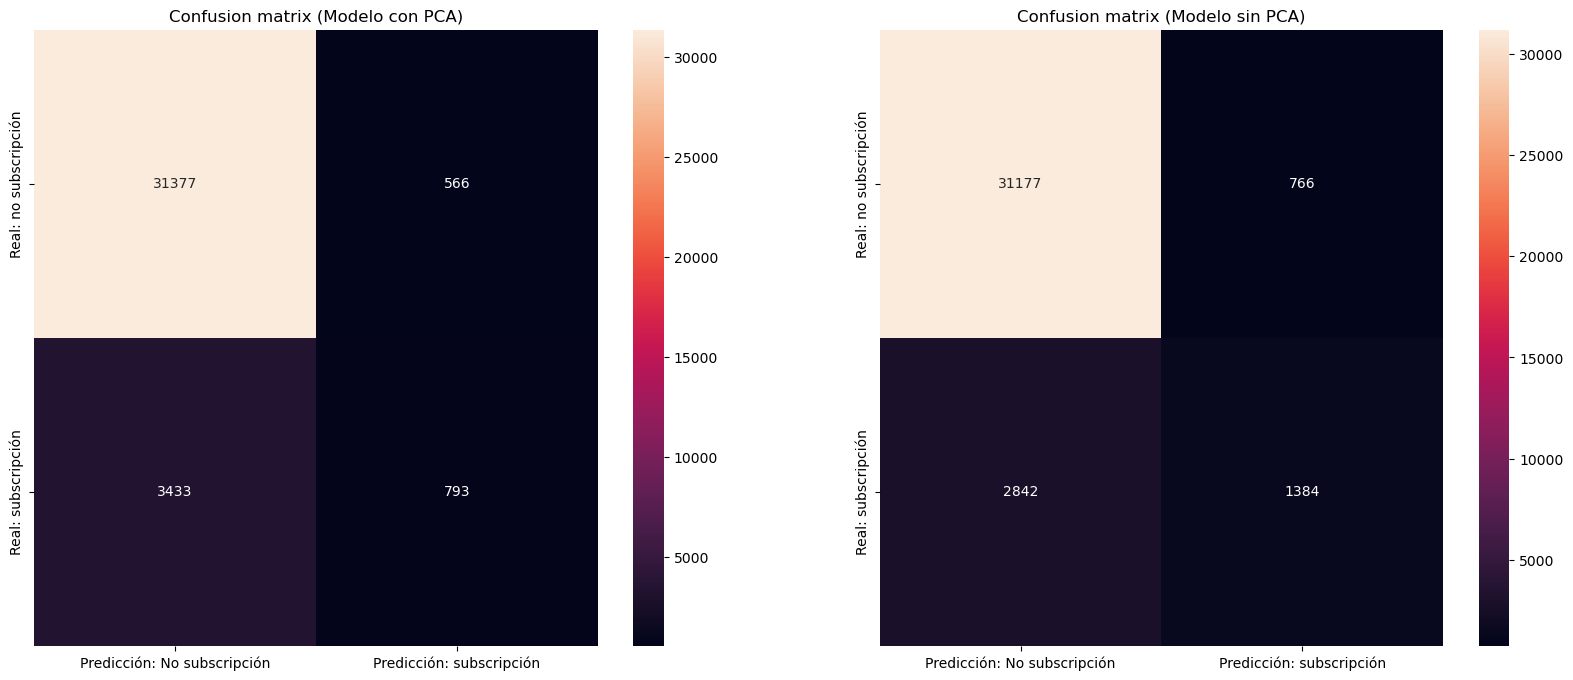

In [126]:
# contruccion de matriz de confusion
cm_2 = confusion_matrix(ytest, ypred_2)
df_cm_2 = pd.DataFrame(cm_2,index = ['Real: no subscripción', 'Real: subscripción'], columns = ['Predicción: No subscripción', 'Predicción: subscripción'])

# grafico de la matriz de confusion del modelo sin PCA y con PCA
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

axes[0].set_title('Confusion matrix (Modelo con PCA)')
sns.heatmap(df_cm_2, annot=True,fmt='g', ax=axes[0])

axes[1].set_title('Confusion matrix (Modelo sin PCA)')
sns.heatmap(df_cm, annot=True,fmt='g', ax=axes[1])
plt.show()

En ambas matirces de confusión se puede observar un buen accuracy porque en su diagonal True positive y False positive se encuentran la mayoria de las predicciones. Por otro lado, viendo el **Sensitivity**, es notoria la diferencia entre el modelo sin PCA y con PCA. Este último, tiene practicamente la mitad de predicciones en la ubicación False positive de la matriz y por ende como se mencionó anteriormente, esto quiere decir que **detecta de peor manera a las Subscription = 1**.

## CONCLUSIÓN

Luego de haber entrenado y analizado las métricas de los modelos de clasificación con y sin reducción de la dimensionalidad (PCA). Concluimos en que el mejor modelo que se ha encontrado para realizar la predicción de la variable categórica "Subscription" es el de **Regresión Logística con hiperparámetro C(costo) de 10 y sin aplicar PCA**. Dicha concluisión surge por los siguientes motivos:
- El **accuraccy** del modelo sin PCA alzanzó un valor en test superior al modelo con PCA (0.900 vs 0.889).
- El modelo con PCA alzanzó un accuraccy similar al modelo sin PCA, utilizando un 62% de las features del dataset original, lo que lo vuelve un modelo más "liviano" para llevar a producción. A pesar de ello, también tuvo un **Sensitivity** aproximadamente un 50% menor al del modelo sin PCA (0.187 vs 0.327), lo que lo vuelve considerablemente peor a la hora de identificar valores de Subscription = 1. Es por ello, que concluimos en que la ventaja del modelo con PCA dada por ser un modelo más liviano, no compensa el hecho de que genera peores predicciones que el modelo sin PCA.